In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
ventas = pd.read_csv('FACT_SALES.CSV')
ventas = ventas.drop(columns = ['WEEK'])

In [3]:
ventas

,ITEM_CODE,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION
0,7501058792808BP2,0.006,0.139,1.000,TOTAL AUTOS AREA 5
1,7501058715883,0.487,116.519,2.916,TOTAL AUTOS AREA 5
2,7702626213774,1.391,68.453,5.171,TOTAL AUTOS AREA 5
3,7501058716422,0.022,1.481,1.833,TOTAL AUTOS AREA 5
4,7501058784353,2.037,182.839,5.375,TOTAL AUTOS AREA 5
...,...,...,...,...,...
121997,7501058792778BP1,1.192,150.829,4.000,TOTAL AUTOS SCANNING MEXICO
121998,7501058757630,1.947,235.416,2.797,TOTAL AUTOS SCANNING MEXICO
121999,7501058753441,18.013,429.289,9.102,TOTAL AUTOS SCANNING MEXICO
122000,7702626204208BP1,21.152,210.276,22.172,TOTAL AUTOS SCANNING MEXICO


In [4]:
calendario = pd.read_excel('DIM_CALENDAR.xlsx')
calendario = calendario.drop(columns = ['WEEK', 'DATE'])
calendario

,YEAR,MONTH,WEEK_NUMBER
0,2021,1,1
1,2021,1,2
2,2021,1,3
3,2021,1,4
4,2021,2,5
...,...,...,...
151,2023,12,48
152,2023,12,49
153,2023,12,50
154,2023,12,51


In [5]:
segmento = pd.read_excel('DIM_SEGMENT.xlsx')
segmento = segmento.drop(columns = ['ATTR1', 'ATTR2', 'ATTR3', 'FORMAT'])
segmento

,CATEGORY,SEGMENT
0,1,BLEACH
1,1,BLEACH
2,1,BLEACH
3,1,BLEACH
4,1,BLEACH
5,1,BLEACH
6,1,BLEACH
7,1,BLEACH
8,1,BLEACH
9,1,BLEACH


In [6]:
categoria = pd.read_csv('DIM_CATEGORY.CSV')
categoria

,ID_CATEGORY,CATEGORY
0,1,FABRIC TREATMENT and SANIT\r\n
1,2,AIR CARE
2,3,LAVAVAJILLAS
3,4,MEGA SUPERFICIES
4,5,LAVATORY CARE & BRC


In [7]:
producto = pd.read_excel('DIM_PRODUCT.XLSX')
producto

,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,CATEGORY,FORMAT,ATTR1,ATTR2,ATTR3
0,INDS. ALEN,CLORALEX,0000075000592,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
1,INDS. ALEN,CLORALEX,0000075000608,CLORALEX EL RENDIDOR BOT.PLAST. 500ML NAL. 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
2,INDS. ALEN,CLORALEX,0000075000615,CLORALEX EL RENDIDOR BOT.PLAST. 950ML NAL. 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
3,INDS. ALEN,CLORALEX,0000075000622,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
4,INDS. ALEN,CLORALEX,0000075000639,CLORALEX EL RENDIDOR BOT.PLAST. 3750ML NAL 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
...,...,...,...,...,...,...,...,...,...
500,RECKITT,VANISH,7501058789778BP1,VANISH EXT HIGIENE REM MANCHAS GAL 4LT + VANIS...,1,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,ROSA
501,INDS. ALEN,CLORALEX,7501025412142,CLORALEX AROMAS BLANQUEADOR C/AROMA LAVANDA GA...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
502,INDS. ALEN,CLORALEX,NaN,CLORALEX EL RENDIDOR BOT PLAST 2LT,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
503,CLOROX,CLOROX,NaN,CLOROX MASCOTAS BLANQUEADOR+DETERGENTE GALON 10L,1,LIQUIDO,CLORO,CLORO,MASCOTAS


In [8]:
producto.dropna(inplace = True)
producto.drop_duplicates(inplace = True)
producto

,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,CATEGORY,FORMAT,ATTR1,ATTR2,ATTR3
0,INDS. ALEN,CLORALEX,0000075000592,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
1,INDS. ALEN,CLORALEX,0000075000608,CLORALEX EL RENDIDOR BOT.PLAST. 500ML NAL. 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
2,INDS. ALEN,CLORALEX,0000075000615,CLORALEX EL RENDIDOR BOT.PLAST. 950ML NAL. 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
3,INDS. ALEN,CLORALEX,0000075000622,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
4,INDS. ALEN,CLORALEX,0000075000639,CLORALEX EL RENDIDOR BOT.PLAST. 3750ML NAL 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
...,...,...,...,...,...,...,...,...,...
498,IBERIA,IBERIA,8411660210036,IBERIA REVOLUTION QUITA MANCHAS ACCIDENTALES B...,1,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,PRE LAVADOR
499,JABONERA LA ESPUMA,BCLORHADA,7501681101305BP1,BCLORHADA MASC DET DES C/CLOR1L+MM MASCHOGAR D...,1,LIQUIDO,CLORO,CLORO,MASCOTAS
500,RECKITT,VANISH,7501058789778BP1,VANISH EXT HIGIENE REM MANCHAS GAL 4LT + VANIS...,1,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,ROSA
501,INDS. ALEN,CLORALEX,7501025412142,CLORALEX AROMAS BLANQUEADOR C/AROMA LAVANDA GA...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO


In [9]:
df_final = pd.concat([ventas, segmento], axis = 1)
df_final

,ITEM_CODE,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,CATEGORY,SEGMENT
0,7501058792808BP2,0.006,0.139,1.000,TOTAL AUTOS AREA 5,1.0,BLEACH
1,7501058715883,0.487,116.519,2.916,TOTAL AUTOS AREA 5,1.0,BLEACH
2,7702626213774,1.391,68.453,5.171,TOTAL AUTOS AREA 5,1.0,BLEACH
3,7501058716422,0.022,1.481,1.833,TOTAL AUTOS AREA 5,1.0,BLEACH
4,7501058784353,2.037,182.839,5.375,TOTAL AUTOS AREA 5,1.0,BLEACH
...,...,...,...,...,...,...,...
121997,7501058792778BP1,1.192,150.829,4.000,TOTAL AUTOS SCANNING MEXICO,NaN,NaN
121998,7501058757630,1.947,235.416,2.797,TOTAL AUTOS SCANNING MEXICO,NaN,NaN
121999,7501058753441,18.013,429.289,9.102,TOTAL AUTOS SCANNING MEXICO,NaN,NaN
122000,7702626204208BP1,21.152,210.276,22.172,TOTAL AUTOS SCANNING MEXICO,NaN,NaN


In [10]:
df_final.dropna(inplace = True)
df_final.drop_duplicates(inplace = True)
df_final['SEGMENT'] = pd.factorize(df_final['SEGMENT'])[0]
df_final['REGION'] = pd.factorize(df_final['REGION'])[0]
df_final = df_final.drop(columns = ['ITEM_CODE'])
df_final

,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,CATEGORY,SEGMENT
0,0.006,0.139,1.000,0,1.0,0
1,0.487,116.519,2.916,0,1.0,0
2,1.391,68.453,5.171,0,1.0,0
3,0.022,1.481,1.833,0,1.0,0
4,2.037,182.839,5.375,0,1.0,0
5,0.005,0.679,1.250,0,1.0,0
6,0.004,0.553,1.000,0,1.0,0
7,0.001,0.128,1.000,0,1.0,0
8,0.716,71.018,4.287,0,1.0,0
9,2.704,61.229,11.220,0,1.0,0


In [11]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_final)

In [12]:
fields = df_final.iloc[:,[1,2]].values
print(fields)

[[1.39000e-01 1.00000e+00]
 [1.16519e+02 2.91600e+00]
 [6.84530e+01 5.17100e+00]
 [1.48100e+00 1.83300e+00]
 [1.82839e+02 5.37500e+00]
 [6.79000e-01 1.25000e+00]
 [5.53000e-01 1.00000e+00]
 [1.28000e-01 1.00000e+00]
 [7.10180e+01 4.28700e+00]
 [6.12290e+01 1.12200e+01]
 [2.37920e+01 1.79340e+01]
 [1.46759e+02 3.75500e+00]
 [5.58560e+01 2.82820e+01]
 [8.01690e+01 2.30250e+01]
 [4.03360e+01 2.05400e+01]
 [8.61040e+01 2.15050e+01]
 [1.04000e-01 1.60000e+00]
 [9.31240e+01 4.27900e+00]
 [1.29530e+01 2.16700e+00]
 [6.60530e+01 3.31100e+00]
 [1.60000e-01 2.00000e+00]
 [5.10620e+01 7.93300e+00]
 [1.29976e+02 7.79100e+00]
 [2.04000e+00 3.42900e+00]
 [4.60000e-02 1.00000e+00]
 [1.92500e+00 8.36400e+00]
 [6.20000e-02 1.50000e+00]
 [1.31200e+00 4.55600e+00]
 [1.43000e-01 1.30000e+01]
 [1.28050e+01 8.52500e+00]
 [8.65100e+00 4.58500e+00]
 [2.34000e-01 5.00000e+00]
 [4.42500e+00 5.88400e+00]
 [4.20000e-02 1.00000e+00]
 [1.88800e+01 1.30900e+00]
 [1.98810e+01 3.21100e+00]
 [1.65270e+01 2.82800e+00]
 

In [13]:
wcss = []
for index in range (1,11):
    kmeans = KMeans(n_clusters = index, init = 'k-means++', random_state = 2)
    kmeans.fit(fields)

    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

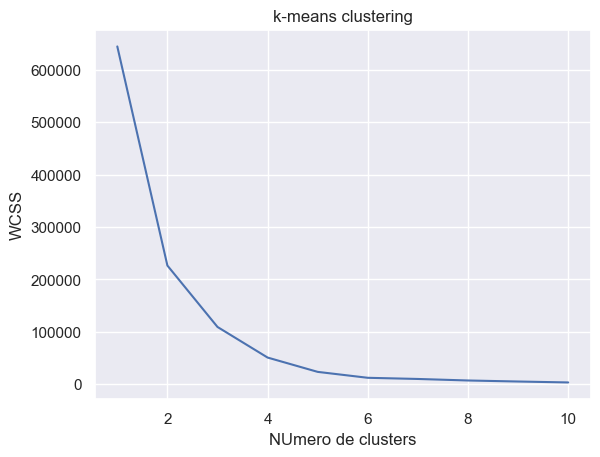

In [14]:
# Graficacion del 'codo de jambu'
sb.set()
plt.plot(range(1,11), wcss)
plt.title("k-means clustering")
plt.xlabel('NUmero de clusters')
plt.ylabel('WCSS') # Weigthed cluster sum of squares

In [15]:
# Criterio de silueta (Silhouette)
from sklearn import datasets
from sklearn.metrics import silhouette_score

x = df_final.iloc[:, [1,2]].to_numpy()
for j in range(2, 12):
    kmeans = KMeans(n_clusters = j, random_state = 42)
    kmeans.fit_predict(x)
    # Calculamos el score de silueta
    score = silhouette_score(x, kmeans.labels_, metric = 'euclidean')
    print('score silhouette: ', 'k = ', j, ':', score)

score silhouette:  k =  2 : 0.7849499453563926
score silhouette:  k =  3 : 0.6281997450609283
score silhouette:  k =  4 : 0.6356059115847625
score silhouette:  k =  5 : 0.6655948051661955
score silhouette:  k =  6 : 0.677698844175649
score silhouette:  k =  7 : 0.6149144395131926
score silhouette:  k =  8 : 0.6136504543278187
score silhouette:  k =  9 : 0.5533834011121946
score silhouette:  k =  10 : 0.5423236688894194
score silhouette:  k =  11 : 0.5519934683578831


In [16]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
cluster_values = kmeans.fit_predict(fields)
print(cluster_values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0]


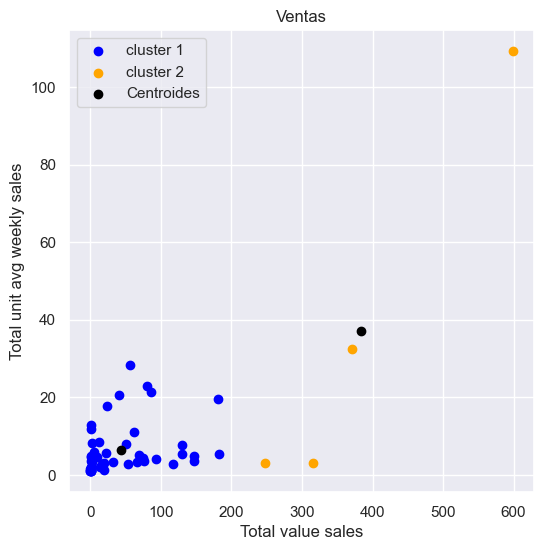

In [50]:
plt.figure(figsize = (6,6))
plt.scatter(fields[cluster_values == 0,0], fields[cluster_values == 0,1], c = 'blue', label = 'cluster 1')
plt.scatter(fields[cluster_values == 1,0], fields[cluster_values == 1,1], c = 'orange', label = 'cluster 2')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'black', label= 'Centroides')

plt.title('Ventas')
plt.xlabel('Total value sales')
plt.ylabel('Total unit avg weekly sales') 
plt.legend()

In [18]:
# Supongamos que 'cluster_values' contiene las etiquetas obtenidas por K-Means
df_final['Cluster'] = cluster_values

In [19]:
# Estadísticas descriptivas de cada clúster
resumen_cluster = df_final.groupby('Cluster').mean()
print(resumen_cluster)

         TOTAL_UNIT_SALES  TOTAL_VALUE_SALES  TOTAL_UNIT_AVG_WEEKLY_SALES  \
Cluster                                                                     
0                1.511816          42.701245                     6.370898   
1               23.007000         383.423500                    37.000750   

           REGION  CATEGORY   SEGMENT  
Cluster                                
0        0.673469       1.0  1.755102  
1        2.000000       1.0  1.750000  


In [20]:
conteo_por_cluster = df_final.groupby(['Cluster', 'REGION']).size()
print(conteo_por_cluster)

Cluster  REGION
0        0         25
         1         15
         2          9
1        2          4
dtype: int64
